# Import des modules

In [1]:
import pandas as pd
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime
from datetime import datetime
import geopandas

# Import des données

In [2]:
cities = pd.read_csv("data\\cities.csv")
providers = pd.read_csv("data\\providers.csv")
stations = pd.read_csv("data\\stations.csv")
ticket_data = pd.read_csv("data\\ticket_data.csv")

# 1.Prise de connaissance des données (format, taille ...)

## cities.csv

In [3]:
print(cities.shape)
cities.head()

(8040, 6)


,id,local_name,unique_name,latitude,longitude,population
0,5159,"Padua, Veneto, Italia",padua,45.406435,11.876761,209678.0
1,76,"Barcelona, Cataluña, España",barcelona,41.385064,2.173404,1611822.0
2,81,"Basel, Basel-Stadt, Schweiz",basel,47.593437,7.619812,NaN
3,259,"Erlangen, Bayern, Deutschland",erlangen,49.589674,11.011961,105412.0
4,11979,"Balș, Olt, România",balș,44.353354,24.095672,NaN


## providers.csv

In [4]:
print(providers.shape)
providers.head()

(227, 10)


,id,company_id,provider_id,name,fullname,has_wifi,has_plug,has_adjustable_seats,has_bicycle,transport_type
0,9,1,NaN,ouibus,Ouibus,True,True,True,False,bus
1,10,2,NaN,deinbus,Deinbus.de,False,False,False,False,bus
2,11,3,NaN,infobus,Infobus,False,False,False,False,bus
3,12,4,NaN,studentAgency,Student Agency,False,False,False,False,bus
4,13,5,NaN,flixbus,Flixbus,True,False,False,False,bus


## stations.csv

In [5]:
print(stations.shape)
stations.head()

(11035, 4)


,id,unique_name,latitude,longitude
0,1,Aalen (Stuttgarter Straße),48.835296,10.092956
1,2,Aéroport Bordeaux-Mérignac,44.830226,-0.700883
2,3,Aéroport CDG,49.009900,2.559310
3,4,Aéroport de Berlin-Schönefeld,52.389446,13.520345
4,5,Aéroport de Dresden,51.123604,13.764737


## ticket_data.csv

In [6]:
print(ticket_data.shape)
ticket_data.head()

(74168, 12)


,id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00,2017-10-13 20:10:00+00,4550,2017-10-01 00:13:31.327+00,NaN,NaN,611,542
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00,2017-10-14 06:55:00+00,1450,2017-10-01 00:13:35.773+00,"{149,418}",{13},611,542
2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 21:24:00+00,7400,2017-10-01 00:13:40.212+00,"{798,798,6794,6246}","{8377,8376}",611,542
3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 11:02:00+00,13500,2017-10-01 00:13:40.213+00,"{798,798,6794,6246}","{8377,8376}",611,542
4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00,2017-10-14 19:32:00+00,7710,2017-10-01 00:13:40.213+00,"{5983,5983}",{8380},611,542


# 2.Représentation géographique des stations avec GeoPandas à partir des coordonnées GPS

In [7]:
from shapely.geometry import Polygon

In [8]:
plt.rcParams['figure.figsize']=(12,10)
plt.rcParams['font.size']=12

On utilise un dataset de GeoPandas pour obtenir une carte du monde

<AxesSubplot:>

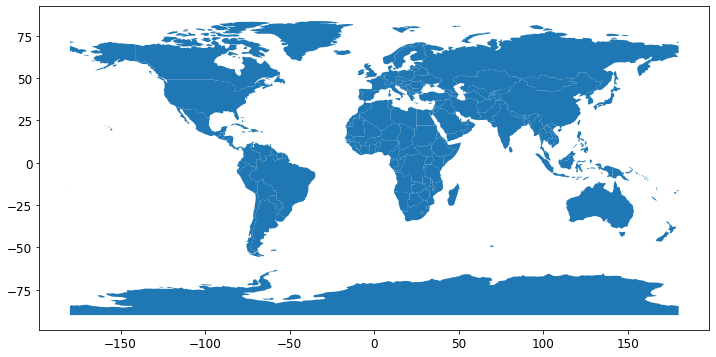

In [9]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.plot()

On créer un GeoDataFrame de la localisation GPS des stations pouvant être plot par dessus la carte du monde

In [10]:
gdf = geopandas.GeoDataFrame(stations, geometry=geopandas.points_from_xy(stations.longitude,stations.latitude))

In [11]:
gdf.head()

,id,unique_name,latitude,longitude,geometry
0,1,Aalen (Stuttgarter Straße),48.835296,10.092956,POINT (10.09296 48.83530)
1,2,Aéroport Bordeaux-Mérignac,44.830226,-0.700883,POINT (-0.70088 44.83023)
2,3,Aéroport CDG,49.009900,2.559310,POINT (2.55931 49.00990)
3,4,Aéroport de Berlin-Schönefeld,52.389446,13.520345,POINT (13.52035 52.38945)
4,5,Aéroport de Dresden,51.123604,13.764737,POINT (13.76474 51.12360)


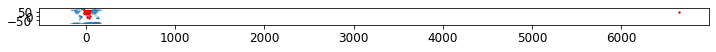

In [12]:
ax = world.plot()

gdf.plot(ax=ax, color='red',markersize=2)

plt.show()

stations à 6000+ longitude ?
On va verrifier les données alors ! Voyons ce qui est en dehors de l'Europe.

In [13]:
for index, row in stations.iterrows():
    if row.longitude > 67 or row.latitude < 35:
        print("index à drop ou à modifer : ",index)
        print(row,"\n")

index à drop ou à modifer :  161
id                                       162
unique_name    Combloux - Office du tourisme
latitude                           45.894811
longitude                             6645.0
geometry              POINT (6645 45.894811)
Name: 161, dtype: object 

index à drop ou à modifer :  2285
id                                          2286
unique_name                                Libeň
latitude                                4.544255
longitude                              40.711791
geometry       POINT (40.7117911862971 4.544255)
Name: 2285, dtype: object 

index à drop ou à modifer :  2498
id                                             2499
unique_name                            mez. letiště
latitude                                  -22.35579
longitude                                 29.988051
geometry       POINT (29.9880507559481 -22.3557895)
Name: 2498, dtype: object 

index à drop ou à modifer :  2560
id                                      2561
unique_

### Vrai coordonées:
#### Combloux - Office du tourisme : 45.89463392225536, 6.644955826314295
#### Libeň : 50.101246, 14.501565
#### náměstí : dans les montagnes en Angola ? ou place à Prague ? id non utilisé dans ticket_dat.csv donc on va l'ignorer pour la suite (drop)

Le reste existe vraiment et aux bonnes coordonées :)

In [14]:
#Combloux - Office du tourisme : 45.89463392225536, 6.644955826314295 
stations.at[161, 'longitude'] = 6.644955

#Libeň : 50.101246, 14.501565
stations.at[2285, 'longitude'] = 14.501565
stations.at[2285, 'latitude'] = 50.101246

#náměstí : drop dans le doute
stations.drop(2560,inplace=True)


In [15]:
gdf = geopandas.GeoDataFrame(stations, geometry=geopandas.points_from_xy(stations.longitude,stations.latitude))

On va pouvoir zoomer un peu maintenant qu'on est sur de nos données.

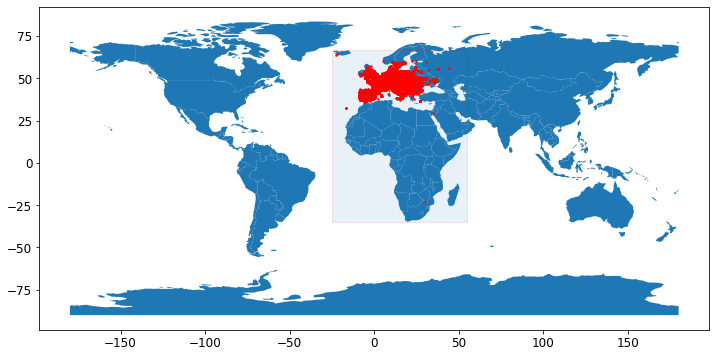

In [16]:
polygon = Polygon([(-25,-35), (55,-35), (55,67),(-25,67)])
poly_gdf = geopandas.GeoDataFrame([1], geometry=[polygon], crs=world.crs)
fig,ax=plt.subplots()
ax=world.plot(ax=ax)
poly_gdf.plot(edgecolor='red',ax=ax, alpha=0.1)
gdf.plot(ax=ax, color='red',markersize=2)
plt.show()

<AxesSubplot:>

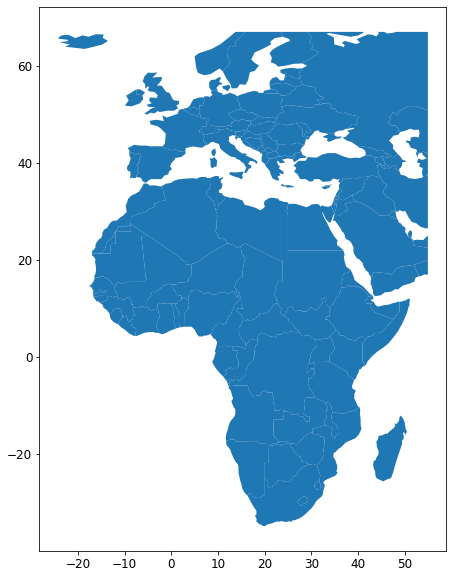

In [17]:
world=geopandas.clip(world, polygon) 
world.plot()

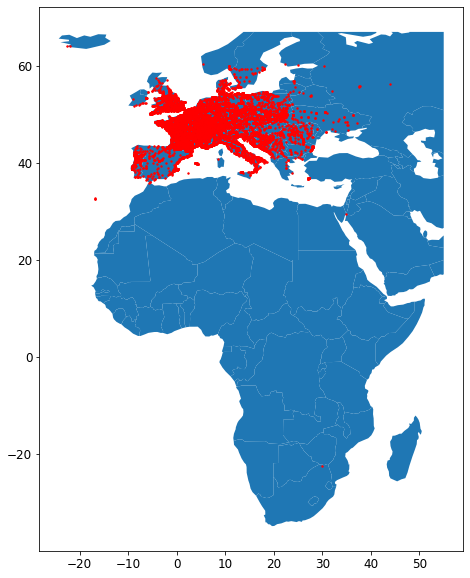

In [18]:
ax = world.plot()

gdf.plot(ax=ax, color='red',markersize=2)

plt.show()

Tictactrip a des stations enregistrées un peu partout en Europe de l'ouest et centrale, et même quelques une en Afrique. C'est impréssionnant !
Je croyais que Tictatrip se focalisait sur les transport terrestre. C'est géré comment pour les Cannaries et l'Afrique ? Ca compte les bateaux x) ?

# 3.Calcul de la distance des trajets

In [19]:
import math


def distance(origin, destination):
    """Trouvé sur : https://stackoverflow.com/a/38187562
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d


Vérifions la fonction en calculant la distance entre le centre ville de Paris et de Rennes qui est de 308 km à vol d'oiseau.

In [20]:
coordParis = (48.85944763250031, 2.344967910438302)
coordRennes = (48.11017984127178, -1.6792621885802836)
distance(coordParis, coordRennes)

308.0309187265837

Pour calculer la distance d'un trajet il faut d'abord que nous retrouvons les coordonées des villes de départ et d'arrivé dans stations.csv ou cities.csv sinon.

In [21]:
dictStationCoordinate = {}
dictCitiesCoordinate = {}

for index, row in stations.iterrows():
    dictStationCoordinate[int(row.id)] = (row.latitude, row.longitude)
    
for index, row in cities.iterrows():
    dictCitiesCoordinate[int(row.id)] = (row.latitude, row.longitude)

In [22]:
dictStationCoordinate

{1: (48.835296, 10.092956),
 2: (44.830226, -0.700883),
 3: (49.0099, 2.55931),
 4: (52.389446, 13.520345),
 5: (51.1236038208008, 13.7647371292114),
 6: (46.230121, 6.109288),
 7: (49.462541, 2.116935),
 8: (50.1075325012207, 14.2693090438843),
 9: (52.55376, 13.29231),
 10: (45.505432, 12.338465),
 11: (45.504946, 12.339289),
 12: (45.719094, 5.079539),
 13: (52.3892784118652, 13.5198669433594),
 14: (48.1196708679199, 16.56298828125),
 15: (48.356118, 11.789859),
 16: (44.165376, 0.606235),
 17: (53.9367, 14.189175),
 18: (54.379826, 12.41892),
 19: (48.462035, 11.134387),
 20: (48.5657041, -3.2060747),
 21: (53.380065, 11.62677),
 22: (45.672725, 6.382503),
 23: (48.210265, 9.030386),
 24: (50.8184264, 19.1397375),
 25: (44.908637, 8.608076),
 26: (52.523164, 13.414503),
 27: (47.682164, 9.202497),
 28: (45.089737, 6.075874),
 29: (46.4957237243652, 11.3552179336548),
 30: (50.732885, 9.241158),
 31: (50.750707, 9.265129),
 32: (51.386086, 8.506352),
 33: (53.037369, 13.192189),
 3

In [23]:
dictCitiesCoordinate

{5159: (45.4064349, 11.8767611),
 76: (41.3850639, 2.1734035),
 81: (47.5934368, 7.6198121),
 259: (49.5896744, 11.0119611),
 11979: (44.3533537, 24.0956725),
 10314: (44.61909535, 21.1765217697481),
 11155: (48.8046, 4.2595),
 11788: (45.817156, 6.952375),
 11984: (35.6678203, -101.3973876),
 11825: (48.5761806, 19.1371155),
 11878: (40.004, -0.0634),
 11992: (46.2818451, 11.4371429),
 11998: (44.3301785, 23.7948808),
 12002: (44.554523, 23.5200088),
 12005: (48.08998, 5.76017),
 834: (45.457331, 6.901682),
 10339: (44.897001, 6.634323),
 10712: (50.785661, 6.136859),
 5409: (50.986, 4.8365),
 5439: (45.5545, 6.6488),
 5423: (40.3514, 15.0019),
 5445: (43.5249, 5.4541),
 12014: (37.2531, -6.9508),
 12015: (45.7678128, 22.9072331),
 12016: (48.2657, 6.1419),
 12017: (46.22894, -1.5413),
 12018: (45.94304, -1.30741),
 5444: (43.5229, 5.4453),
 9378: (46.08646, 2.04508),
 12023: (48.29707, 4.57794),
 12029: (49.34051, 6.03829),
 12033: (43.0387, 0.5928),
 12035: (43.41, 0.257),
 11989: (

In [24]:
ticket_data_distance = ticket_data.copy()

A partir de ça on peut déterminer la distance de chaque trajet.

In [25]:
dictTicketDistance = {}
for index, row in ticket_data_distance.iterrows():
    if not np.isnan(row.o_station) and not np.isnan(row.d_station):
        dictTicketDistance[row.id] = distance(dictStationCoordinate[row.o_station],dictStationCoordinate[row.d_station])
    elif not np.isnan(row.o_city) and not np.isnan(row.d_city):
        dictTicketDistance[row.id] = distance(dictCitiesCoordinate[row.o_city],dictCitiesCoordinate[row.d_city])
    

In [26]:
def ticketToDistance(x):
    return dictTicketDistance[x]

In [27]:
ticket_data_distance['distance'] = ticket_data_distance['id'].apply(ticketToDistance)

In [28]:
ticket_data_distance.head()

,id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city,distance
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00,2017-10-13 20:10:00+00,4550,2017-10-01 00:13:31.327+00,NaN,NaN,611,542,503.197167
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00,2017-10-14 06:55:00+00,1450,2017-10-01 00:13:35.773+00,"{149,418}",{13},611,542,504.165333
2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 21:24:00+00,7400,2017-10-01 00:13:40.212+00,"{798,798,6794,6246}","{8377,8376}",611,542,504.318452
3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 11:02:00+00,13500,2017-10-01 00:13:40.213+00,"{798,798,6794,6246}","{8377,8376}",611,542,504.318452
4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00,2017-10-14 19:32:00+00,7710,2017-10-01 00:13:40.213+00,"{5983,5983}",{8380},611,542,504.318452


# 3.Analyse des tickets

## 3.1 Analyse des prix

In [29]:
ticket_data.head()

,id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00,2017-10-13 20:10:00+00,4550,2017-10-01 00:13:31.327+00,NaN,NaN,611,542
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00,2017-10-14 06:55:00+00,1450,2017-10-01 00:13:35.773+00,"{149,418}",{13},611,542
2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 21:24:00+00,7400,2017-10-01 00:13:40.212+00,"{798,798,6794,6246}","{8377,8376}",611,542
3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 11:02:00+00,13500,2017-10-01 00:13:40.213+00,"{798,798,6794,6246}","{8377,8376}",611,542
4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00,2017-10-14 19:32:00+00,7710,2017-10-01 00:13:40.213+00,"{5983,5983}",{8380},611,542


Text(0, 0.5, 'Nombre de trajet')

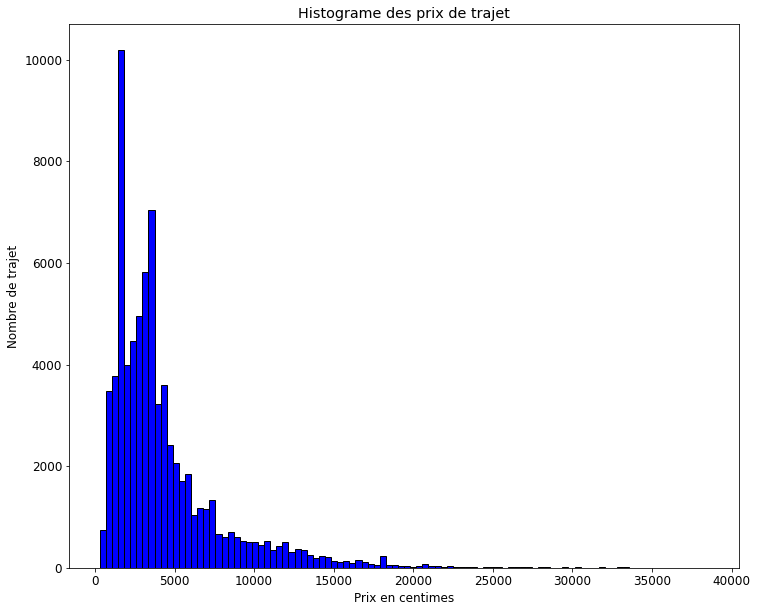

In [30]:
plt.hist(ticket_data['price_in_cents'], color = 'blue', edgecolor = 'black',
         bins = int(100))

plt.title('Histograme des prix de trajet')
plt.xlabel('Prix en centimes')
plt.ylabel('Nombre de trajet')

In [31]:
prices = ticket_data['price_in_cents']

print('Prix min : ', np.min(prices)/100, "€")
print('Prix moyen : ', np.mean(prices)/100, "€")
print('Prix max : ', np.max(prices)/100, "€")

Prix min :  3.0 €
Prix moyen :  43.82711061374178 €
Prix max :  385.5 €


In [32]:
quantiles = prices.quantile([0.25,0.5,0.75]).to_list()

print('Premier quartile : ', quantiles[0]/100, "€")
print('Prix median : ', quantiles[1]/100, "€")
print('Quatrième quartile : ', quantiles[2]/100, "€")

Premier quartile :  19.0 €
Prix median :  33.5 €
Quatrième quartile :  52.5 €


### 3.1.1 Analyse des prix en fonction du type de transport

In [33]:
providers.head()

,id,company_id,provider_id,name,fullname,has_wifi,has_plug,has_adjustable_seats,has_bicycle,transport_type
0,9,1,NaN,ouibus,Ouibus,True,True,True,False,bus
1,10,2,NaN,deinbus,Deinbus.de,False,False,False,False,bus
2,11,3,NaN,infobus,Infobus,False,False,False,False,bus
3,12,4,NaN,studentAgency,Student Agency,False,False,False,False,bus
4,13,5,NaN,flixbus,Flixbus,True,False,False,False,bus


On fait le lien entre la company dans ticket_data et providers.

In [34]:
dictCompanyTransportType = pd.Series(providers.transport_type.values,index=providers.id).to_dict()

In [35]:
ticket_data_transport_type = ticket_data_distance.copy()

In [36]:
def companyToTransportType(x):
    if x is not None:
        return dictCompanyTransportType[x]
    else:
        return 'unknown'

On ajoute une nouvelle colonne transport_type dans notre copie de ticket_data.

In [37]:
ticket_data_transport_type['transport_type'] = ticket_data_transport_type['company'].apply(companyToTransportType)

In [38]:
ticket_data_transport_type.head()

,id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city,distance,transport_type
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00,2017-10-13 20:10:00+00,4550,2017-10-01 00:13:31.327+00,NaN,NaN,611,542,503.197167,carpooling
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00,2017-10-14 06:55:00+00,1450,2017-10-01 00:13:35.773+00,"{149,418}",{13},611,542,504.165333,bus
2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 21:24:00+00,7400,2017-10-01 00:13:40.212+00,"{798,798,6794,6246}","{8377,8376}",611,542,504.318452,train
3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 11:02:00+00,13500,2017-10-01 00:13:40.213+00,"{798,798,6794,6246}","{8377,8376}",611,542,504.318452,train
4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00,2017-10-14 19:32:00+00,7710,2017-10-01 00:13:40.213+00,"{5983,5983}",{8380},611,542,504.318452,train


Nous allons maintenant découper ce dataframe en fonction du type de transport pour facilement réaliser nos analyses.

In [39]:
ticket_data_transport_type.groupby(by=['transport_type']).size()

transport_type
bus           13798
carpooling    41441
train         18929
dtype: int64

In [40]:
busIndex = ticket_data_transport_type['transport_type'] == 'bus'
carpoolingIndex = ticket_data_transport_type['transport_type'] == 'carpooling'
trainIndex = ticket_data_transport_type['transport_type'] == 'train'

ticket_data_transport_type_bus = ticket_data_transport_type[busIndex]
ticket_data_transport_type_carpooling = ticket_data_transport_type[carpoolingIndex]
ticket_data_transport_type_train = ticket_data_transport_type[trainIndex]

In [41]:
ticket_data_transport_type_bus.shape

(13798, 14)

In [42]:
ticket_data_transport_type_carpooling.shape

(41441, 14)

In [43]:
ticket_data_transport_type_train.shape

(18929, 14)

Nous avons donc bien nos 3 dataframe de la même taille que le nombre indiqué dans le groupby.

### 3.1.2 Analyse des prix des trajets en bus

Text(0, 0.5, 'Nombre de trajet')

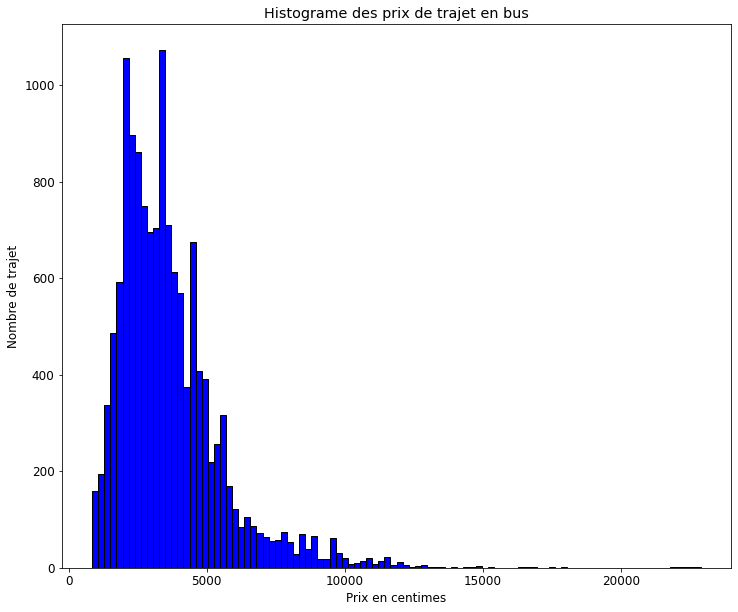

In [44]:
plt.hist(ticket_data_transport_type_bus['price_in_cents'], color = 'blue', edgecolor = 'black',
         bins = int(100))

plt.title('Histograme des prix de trajet en bus')
plt.xlabel('Prix en centimes')
plt.ylabel('Nombre de trajet')

In [45]:
pricesBus = ticket_data_transport_type_bus['price_in_cents']

print('Prix min : ', np.min(pricesBus)/100, "€")
print('Prix moyen : ', np.mean(pricesBus)/100, "€")
print('Prix max : ', np.max(pricesBus)/100, "€")

Prix min :  8.5 €
Prix moyen :  36.524480359472385 €
Prix max :  229.0 €


In [46]:
quantilesBus = pricesBus.quantile([0.25,0.5,0.75]).to_list()

print('Premier quartile : ', quantilesBus[0]/100, "€")
print('Prix median : ', quantilesBus[1]/100, "€ (le prix médian est le même qu'avec tout les types de transport confondus)")
print('Quatrième quartile : ', quantilesBus[2]/100, "€")

Premier quartile :  23.9 €
Prix median :  33.0 € (le prix médian est le même qu'avec tout les types de transport confondus)
Quatrième quartile :  44.0 €


### 3.1.3 Analyse des prix des trajets en train

Text(0, 0.5, 'Nombre de trajet')

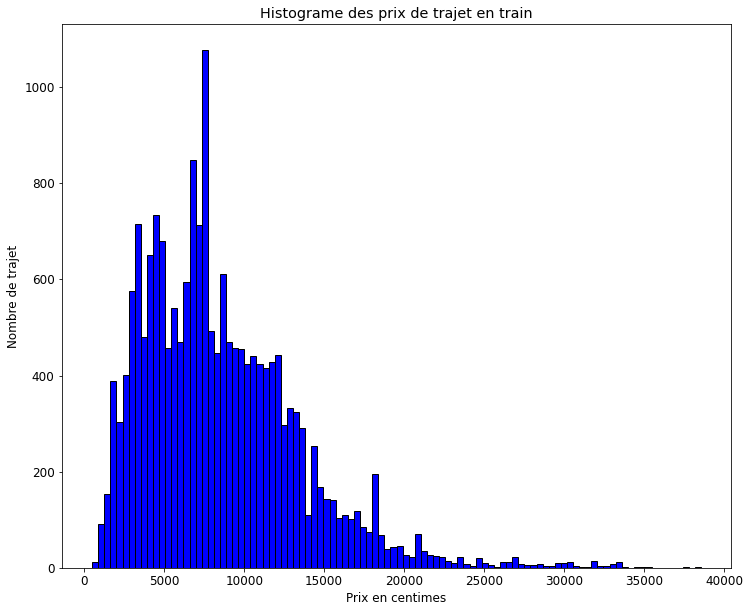

In [47]:
plt.hist(ticket_data_transport_type_train['price_in_cents'], color = 'blue', edgecolor = 'black',
         bins = int(100))

plt.title('Histograme des prix de trajet en train')
plt.xlabel('Prix en centimes')
plt.ylabel('Nombre de trajet')

In [48]:
pricesTrain = ticket_data_transport_type_train['price_in_cents']

print('Prix min : ', np.min(pricesTrain)/100, "€")
print('Prix moyen : ', np.mean(pricesTrain)/100, "€")
print('Prix max : ', np.max(pricesTrain)/100, "€")

Prix min :  4.9 €
Prix moyen :  85.06634793174494 €
Prix max :  385.5 €


In [49]:
quantilesTrain = pricesTrain.quantile([0.25,0.5,0.75]).to_list()

print('Premier quartile : ', quantilesTrain[0]/100, "€")
print('Prix median : ', quantilesTrain[1]/100, "€ (le prix médian en train est 2x supérieur à celui tout types de transport confondu)")
print('Quatrième quartile : ', quantilesTrain[2]/100, "€")

Premier quartile :  48.0 €
Prix median :  75.4 € (le prix médian en train est 2x supérieur à celui tout types de transport confondu)
Quatrième quartile :  112.0 €


### 3.1.4 Analyse des prix des trajets en covoiturage

Text(0, 0.5, 'Nombre de trajet')

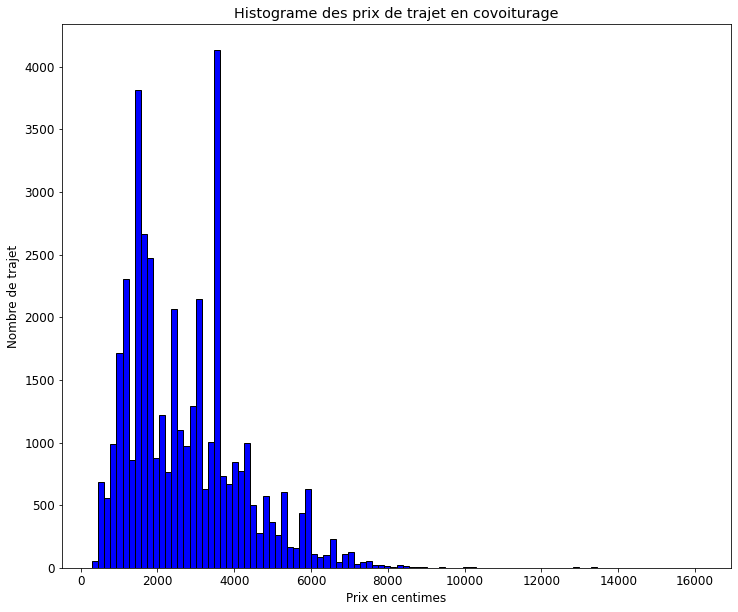

In [50]:
plt.hist(ticket_data_transport_type_carpooling['price_in_cents'], color = 'blue', edgecolor = 'black',
         bins = int(100))

plt.title('Histograme des prix de trajet en covoiturage')
plt.xlabel('Prix en centimes')
plt.ylabel('Nombre de trajet')

In [51]:
pricesCarpooling = ticket_data_transport_type_carpooling['price_in_cents']

print('Prix min : ', np.min(pricesCarpooling)/100, "€")
print('Prix moyen : ', np.mean(pricesCarpooling)/100, "€")
print('Prix max : ', np.max(pricesCarpooling)/100, "€")

Prix min :  3.0 €
Prix moyen :  27.42171907048575 €
Prix max :  161.5 €


In [52]:
quantilesCarpooling = pricesCarpooling.quantile([0.25,0.5,0.75]).to_list()

print('Premier quartile : ', quantilesCarpooling[0]/100, "€")
print('Prix median : ', quantilesCarpooling[1]/100, "€ (le prix médian en covoiturage est d'environ 0.75x celui de tout types de transport confondu)")
print('Quatrième quartile : ', quantilesCarpooling[2]/100, "€")

Premier quartile :  15.5 €
Prix median :  25.0 € (le prix médian en covoiturage est d'environ 0.75x celui de tout types de transport confondu)
Quatrième quartile :  36.0 €


### 3.1.5 Résumé analyse des prix des trajets en fonction du type de transport

Parmis les 74168 trajets, 13798 ont été réalisés en bus, 41441 en covoiturage et 18929 en train. Le prix moyen de trajet est de 43.8€ or il faut prendre conscience que le prix moyen des trajets en bus et covoiturage est largement plus faible (respectivement 36€ et 27€) alors que pour les trajets en train, la moyenne des prix est de 85€. Pour mieux comprende ces écarts de prix, nous allons maintenant nous intéresser à la distance des trajets !

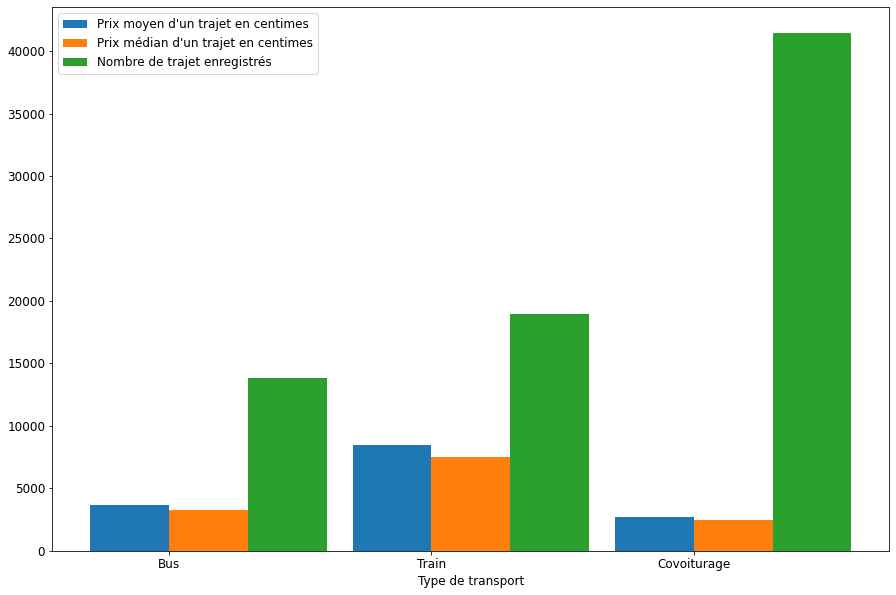

In [53]:
N = 3
ind = np.arange(N)

meanPrices = [np.mean(pricesBus), np.mean(pricesTrain), np.mean(pricesCarpooling)]
meadianPrices = [quantilesBus[1], quantilesTrain[1], quantilesCarpooling[1]]
ticketNumber =  [ticket_data_transport_type_bus.shape[0], ticket_data_transport_type_train.shape[0], ticket_data_transport_type_carpooling.shape[0]]

plt.figure(figsize=(15,10))
width = 0.3       
plt.bar(ind, meanPrices , width, label='Prix moyen d\'un trajet en centimes')
plt.bar(ind + width, meadianPrices , width, label='Prix médian d\'un trajet en centimes')
plt.bar(ind + 2*width, ticketNumber, width, label='Nombre de trajet enregistrés')
plt.xlabel('Type de transport')
plt.xticks(ind + width / 2, ('Bus', 'Train', 'Covoiturage'))
plt.legend(loc='best')
plt.show()

## 3.2 Analyse de la distance des trajets

Text(0, 0.5, 'Nombre de trajet')

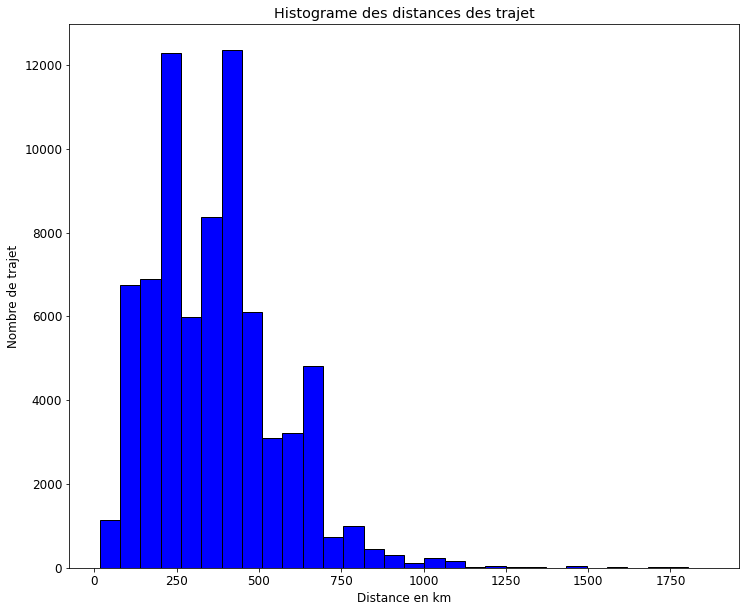

In [54]:
plt.hist(ticket_data_distance['distance'], color = 'blue', edgecolor = 'black',
         bins = int(30))

plt.title('Histograme des distances des trajet')
plt.xlabel('Distance en km')
plt.ylabel('Nombre de trajet')

In [55]:
distances = ticket_data_distance['distance']

print('Distance min : ', np.min(distances), 'km')
print('Distance moyenne : ', np.mean(distances), 'km')
print('Distance max : ', np.max(distances), 'km')

Distance min :  16.57047485369646 km
Distance moyenne :  362.317646314169 km
Distance max :  1865.4687020000365 km


In [56]:
quantilesDistances = distances.quantile([0.25,0.5,0.75]).to_list()

print('Premier quartile : ', quantilesDistances[0], 'km')
print('Distance medianne : ', quantilesDistances[1], 'km')
print('Quatrième quartile : ', quantilesDistances[2], 'km')

Premier quartile :  205.8425905195959 km
Distance medianne :  339.70966549870366 km
Quatrième quartile :  476.6458143691884 km


De la même façon que pour le prix des trajets, nous pouvons comparer la distance des trajets en fonction du type de transport.

### 3.2.1 Analyse de la distance des trajets en bus

Text(0, 0.5, 'Nombre de trajet')

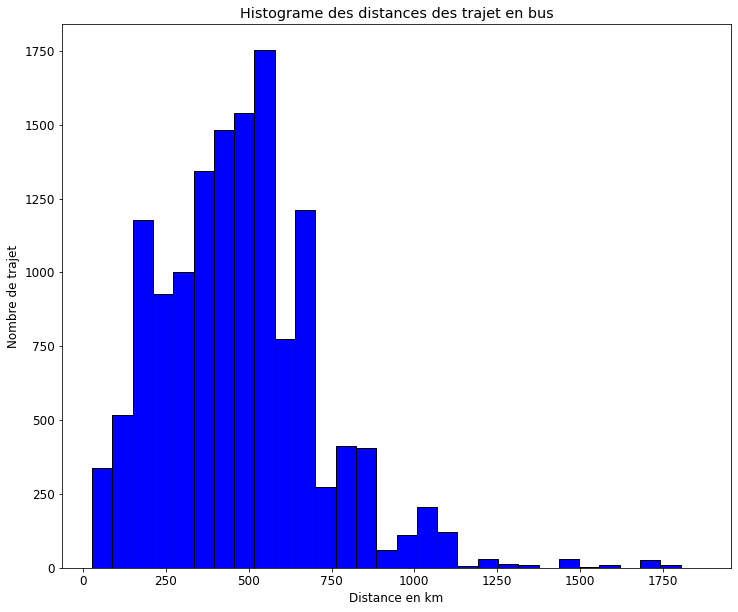

In [57]:
plt.hist(ticket_data_transport_type_bus['distance'], color = 'blue', edgecolor = 'black',
         bins = int(30))

plt.title('Histograme des distances des trajet en bus')
plt.xlabel('Distance en km')
plt.ylabel('Nombre de trajet')

In [58]:
distancesBus = ticket_data_transport_type_bus['distance']

print('Distance min : ', np.min(distancesBus), 'km')
print('Distance moyenne : ', np.mean(distancesBus), 'km (> tout type de transport confondus)')
print('Distance max : ', np.max(distancesBus), 'km')

Distance min :  26.923589662348345 km
Distance moyenne :  472.73551902349806 km (> tout type de transport confondus)
Distance max :  1865.4687020000365 km


In [59]:
quantilesDistancesBus = distancesBus.quantile([0.25,0.5,0.75]).to_list()
print('Premier quartile : ', quantilesDistancesBus[0], 'km')
print('Distance medianne : ', quantilesDistancesBus[1], 'km (> tout type de transport confondus)')
print('Quatrième quartile : ', quantilesDistancesBus[2], 'km')

Premier quartile :  301.6603865938636 km
Distance medianne :  465.84371875446476 km (> tout type de transport confondus)
Quatrième quartile :  595.203021855639 km


### 3.2.2 Analyse de la distance des trajets en train

Text(0, 0.5, 'Nombre de trajet')

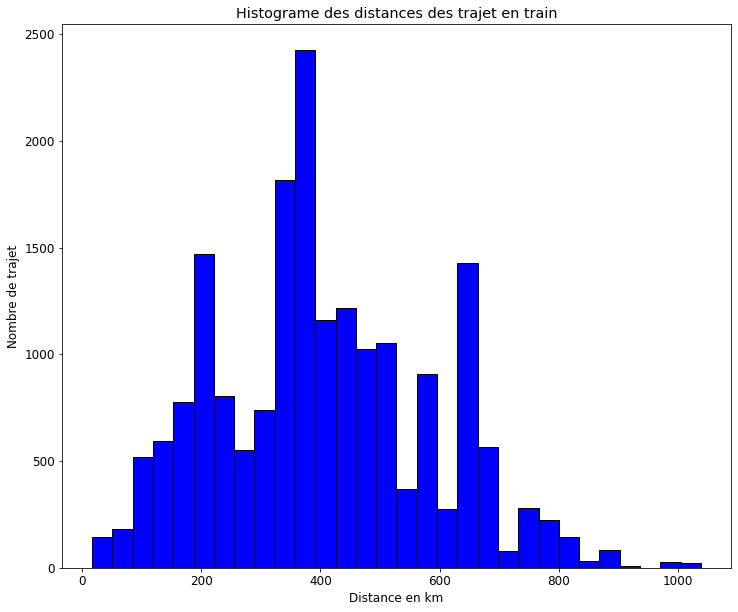

In [60]:
plt.hist(ticket_data_transport_type_train['distance'], color = 'blue', edgecolor = 'black',
         bins = int(30))

plt.title('Histograme des distances des trajet en train')
plt.xlabel('Distance en km')
plt.ylabel('Nombre de trajet')

In [61]:
distancesTrain = ticket_data_transport_type_train['distance']

print('Distance min : ', np.min(distancesTrain), 'km')
print('Distance moyenne : ', np.mean(distancesTrain), 'km (> tout type de transport confondus)')
print('Distance max : ', np.max(distancesTrain), 'km')

Distance min :  16.57047485369646 km
Distance moyenne :  403.64747890841744 km (> tout type de transport confondus)
Distance max :  1038.932519446584 km


In [62]:
quantilesDistancesTrain = distancesTrain.quantile([0.25,0.5,0.75]).to_list()
print('Premier quartile : ', quantilesDistancesTrain[0], 'km')
print('Distance medianne : ', quantilesDistancesTrain[1], 'km (> tout type de transport confondus)')
print('Quatrième quartile : ', quantilesDistancesTrain[2], 'km')

Premier quartile :  262.8172517687484 km
Distance medianne :  389.9551863036577 km (> tout type de transport confondus)
Quatrième quartile :  505.5485914994333 km


### 3.2.3 Analyse de la distance des trajets en covoiturage

Text(0, 0.5, 'Nombre de trajet')

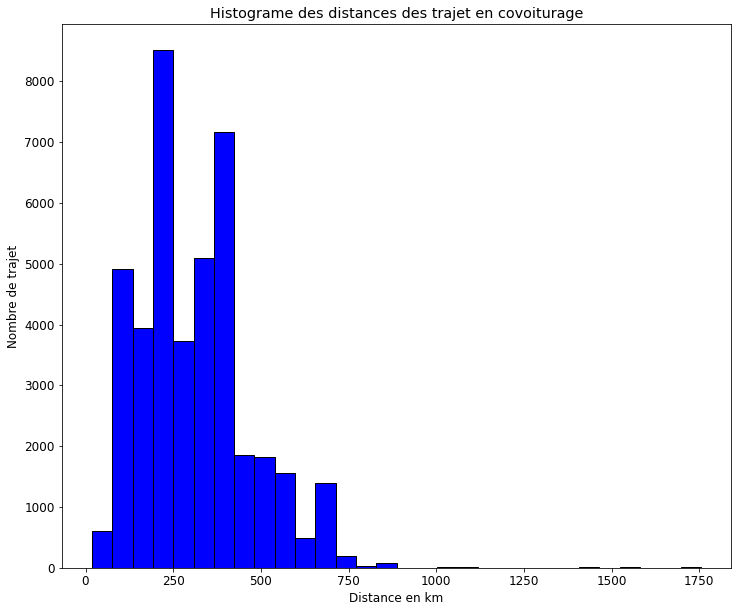

In [63]:
plt.hist(ticket_data_transport_type_carpooling['distance'], color = 'blue', edgecolor = 'black',
         bins = int(30))

plt.title('Histograme des distances des trajet en covoiturage')
plt.xlabel('Distance en km')
plt.ylabel('Nombre de trajet')

In [64]:
distancesCarpooling = ticket_data_transport_type_carpooling['distance']

print('Distance min : ', np.min(distancesCarpooling), 'km')
print('Distance moyenne : ', np.mean(distancesCarpooling), 'km (< tout type de transport confondus)')
print('Distance max : ', np.max(distancesCarpooling), 'km')

Distance min :  18.913241541056735 km
Distance moyenne :  306.67520986669297 km (< tout type de transport confondus)
Distance max :  1754.302973220138 km


In [65]:
quantilesDistancesCarpooling = distancesCarpooling.quantile([0.25,0.5,0.75]).to_list()
print('Premier quartile : ', quantilesDistancesCarpooling[0], 'km')
print('Distance medianne : ', quantilesDistancesCarpooling[1], 'km (< tout type de transport confondus)')
print('Quatrième quartile : ', quantilesDistancesCarpooling[2], 'km')

Premier quartile :  201.44993161453604 km
Distance medianne :  286.98769160046703 km (< tout type de transport confondus)
Quatrième quartile :  390.6282633081959 km


### 3.2.4 Résumé analyse des distances des trajets en fonction du type de transport

Avant de voir ces données, j'aurai pensé que la distance moyenne (& médianne) des trajets en train serait largement supérieure à celle des trajets en bus et covoiturage étant donné la vitesse des TGV comparé aux bus/voitures ! Le choix de la vitesse de transport est contrebalancé par le prix élevé des trajets en train comme nous l'avons vu dans l'analyse en partie 3.1. Comme pour le prix des trajets, ici encore le nombre important de trajet en covoiturage fait baisser la moyenne des distances.

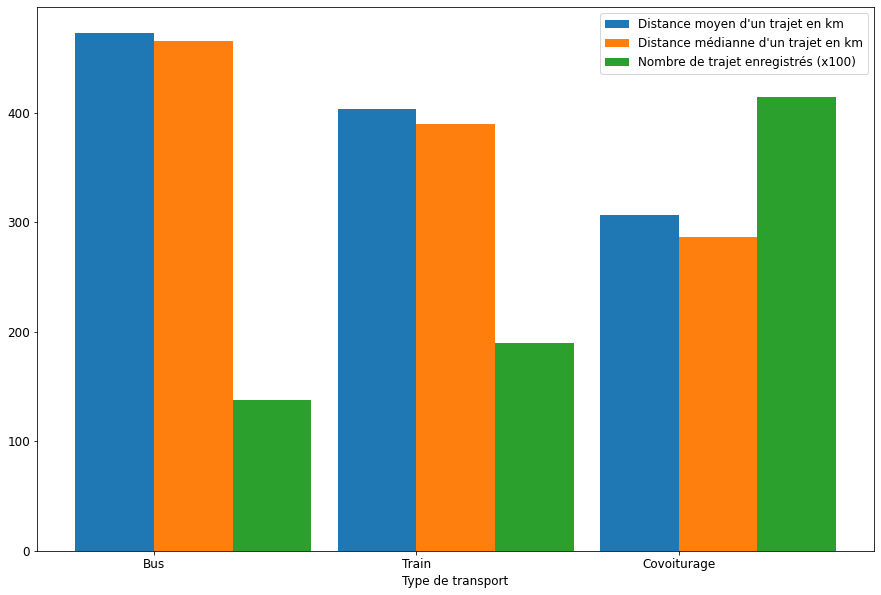

In [66]:
N = 3
ind = np.arange(N)

meanDistances = [np.mean(distancesBus), np.mean(distancesTrain), np.mean(distancesCarpooling)]
meadianDistances = [quantilesDistancesBus[1], quantilesDistancesTrain[1], quantilesDistancesCarpooling[1]]
ticketNumber =  [ticket_data_transport_type_bus.shape[0]/100, ticket_data_transport_type_train.shape[0]/100, ticket_data_transport_type_carpooling.shape[0]/100]

plt.figure(figsize=(15,10))
width = 0.3       
plt.bar(ind, meanDistances , width, label='Distance moyen d\'un trajet en km')
plt.bar(ind + width, meadianDistances , width, label='Distance médianne d\'un trajet en km')
plt.bar(ind + 2*width, ticketNumber, width, label='Nombre de trajet enregistrés (x100)')
plt.xlabel('Type de transport')
plt.xticks(ind + width / 2, ('Bus', 'Train', 'Covoiturage'))
plt.legend(loc='best')
plt.show()

## 3.3 Découpage des trajets en fonction de la distance (0-200km, 201-800km, 800-1000km, 1000+km)

### 3.3.1 Comparaison des prix des trajets en fonction de la distance et du type de transport utilisé

In [67]:
#Bus
shortIndexBus = ticket_data_transport_type_bus['distance'].apply(lambda x: x<=200)
mediumIndexBus = ticket_data_transport_type_bus['distance'].apply(lambda x: x>200 and x<=800)
longIndexBus = ticket_data_transport_type_bus['distance'].apply(lambda x: x>800 and x<=1000)
extraLongIndexBus = ticket_data_transport_type_bus['distance'].apply(lambda x: x>1000)

ticket_data_shortTicketBus = ticket_data_transport_type_bus[shortIndexBus]
ticket_data_mediumTicketBus = ticket_data_transport_type_bus[mediumIndexBus]
ticket_data_longTicketBus = ticket_data_transport_type_bus[longIndexBus]
ticket_data_extraLongTicketBus = ticket_data_transport_type_bus[extraLongIndexBus]


#Train
shortIndexTrain = ticket_data_transport_type_train['distance'].apply(lambda x: x<=200)
mediumIndexTrain = ticket_data_transport_type_train['distance'].apply(lambda x: x>200 and x<=800)
longIndexTrain = ticket_data_transport_type_train['distance'].apply(lambda x: x>800 and x<=1000)
extraLongIndexTrain = ticket_data_transport_type_train['distance'].apply(lambda x: x>1000)

ticket_data_shortTicketTrain = ticket_data_transport_type_train[shortIndexTrain]
ticket_data_mediumTicketTrain = ticket_data_transport_type_train[mediumIndexTrain]
ticket_data_longTicketTrain = ticket_data_transport_type_train[longIndexTrain]
ticket_data_extraLongTicketTrain = ticket_data_transport_type_train[extraLongIndexTrain]

#Carpooling
shortIndexCarpooling = ticket_data_transport_type_carpooling['distance'].apply(lambda x: x<=200)
mediumIndexCarpooling = ticket_data_transport_type_carpooling['distance'].apply(lambda x: x>200 and x<=800)
longIndexCarpooling = ticket_data_transport_type_carpooling['distance'].apply(lambda x: x>800 and x<=1000)
extraLongIndexCarpooling = ticket_data_transport_type_carpooling['distance'].apply(lambda x: x>1000)

ticket_data_shortTicketCarpooling = ticket_data_transport_type_carpooling[shortIndexCarpooling]
ticket_data_mediumTicketCarpooling = ticket_data_transport_type_carpooling[mediumIndexCarpooling]
ticket_data_longTicketCarpooling = ticket_data_transport_type_carpooling[longIndexCarpooling]
ticket_data_extraLongTicketCarpooling = ticket_data_transport_type_carpooling[extraLongIndexCarpooling]

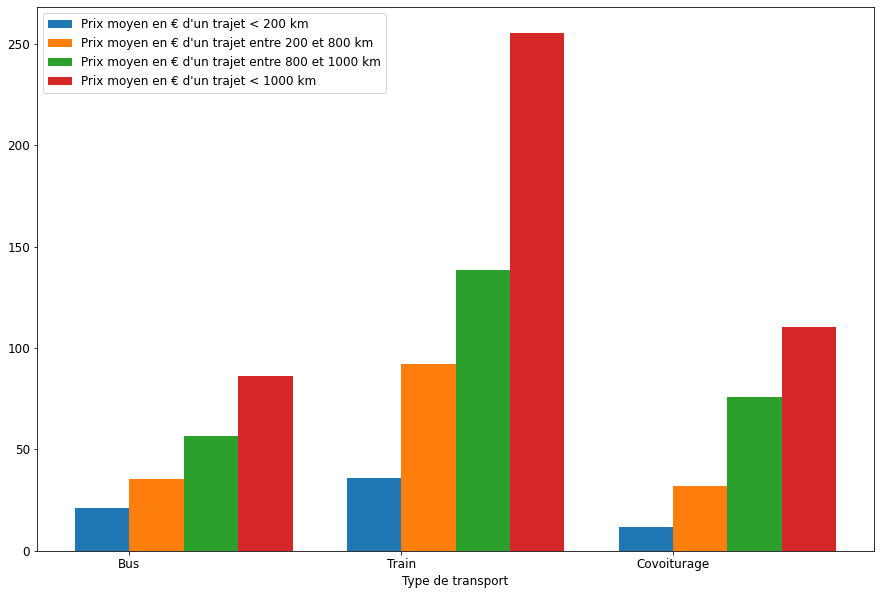

In [68]:
N = 3
ind = np.arange(N)

shortPrices = [np.mean(ticket_data_shortTicketBus['price_in_cents'].apply(lambda x: x/100)), np.mean(ticket_data_shortTicketTrain['price_in_cents'].apply(lambda x: x/100)), np.mean(ticket_data_shortTicketCarpooling['price_in_cents'].apply(lambda x: x/100))]
mediumPrices = [np.mean(ticket_data_mediumTicketBus['price_in_cents'].apply(lambda x: x/100)), np.mean(ticket_data_mediumTicketTrain['price_in_cents'].apply(lambda x: x/100)), np.mean(ticket_data_mediumTicketCarpooling['price_in_cents'].apply(lambda x: x/100))]
longPrices = [np.mean(ticket_data_longTicketBus['price_in_cents'].apply(lambda x: x/100)), np.mean(ticket_data_longTicketTrain['price_in_cents'].apply(lambda x: x/100)), np.mean(ticket_data_longTicketCarpooling['price_in_cents'].apply(lambda x: x/100))]
extraLongPrices = [np.mean(ticket_data_extraLongTicketBus['price_in_cents'].apply(lambda x: x/100)), np.mean(ticket_data_extraLongTicketTrain['price_in_cents'].apply(lambda x: x/100)), np.mean(ticket_data_extraLongTicketCarpooling['price_in_cents'].apply(lambda x: x/100))]

plt.figure(figsize=(15,10))
width = 0.2       
plt.bar(ind, shortPrices , width, label='Prix moyen en € d\'un trajet < 200 km')
plt.bar(ind + width, mediumPrices , width, label='Prix moyen en € d\'un trajet entre 200 et 800 km')
plt.bar(ind + 2*width, longPrices, width, label='Prix moyen en € d\'un trajet entre 800 et 1000 km')
plt.bar(ind + 3*width, extraLongPrices , width, label='Prix moyen en € d\'un trajet < 1000 km')
plt.xlabel('Type de transport')
plt.xticks(ind + width / 2, ('Bus', 'Train', 'Covoiturage'))
plt.legend(loc='best')
plt.show()

D'après ce graphique, nous pouvons conclure plusieurs choses. Tout d'abord, le train est plus cher dans TOUT les cas, peut importe la distance du trajet. Ensuite, pour départager le prix des trajets en bus et en covoiturage, c'est moins évident. Le covoiturage est en moyenne moins cher sur des trajets < 800 km, mais au dela de 800 km, c'est le bus qui est le moins cher.

Comme le prix ne fait pas tout lors du choix de type de transport, nous allons maintenant refaire cette analyse mais en comparant les temps de trajet !

### 3.3.2 Comparaison de la durée des trajets en fonction de la distance et du type de transport utilisé

Comme nous ne somme pas à la milliseconde près et que n'arrive pas à trouver le format datetime correspondant au millisecondes, nous pouvons les ignorer.

In [69]:
ticket_data_duration = ticket_data_transport_type.copy()
ticket_data_duration['arrival_ts'] = ticket_data_duration['arrival_ts'].apply(lambda x: x.split('+')[0])
ticket_data_duration['departure_ts'] = ticket_data_duration['departure_ts'].apply(lambda x: x.split('+')[0])

Je calcul ensuite la durée des trajets en comparant la date d'arrivé et la date de départ pour chaque trajet.

In [70]:
listDurations = []
for idx, row in ticket_data_duration.iterrows():
    arrival = datetime.strptime(row['arrival_ts'], "%Y-%m-%d %H:%M:%S")
    #print(arrival)
    departure = datetime.strptime(row['departure_ts'], "%Y-%m-%d %H:%M:%S")
    #print(departure)
    delta = arrival-departure
    #print(delta.total_seconds())
    listDurations.append(delta.total_seconds()/60)

In [71]:
ticket_data_duration['duration'] = listDurations

In [72]:
ticket_data_duration

,id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city,distance,transport_type,duration
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00,2017-10-13 20:10:00,4550,2017-10-01 00:13:31.327+00,NaN,NaN,611,542,503.197167,carpooling,370.0
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00,2017-10-14 06:55:00,1450,2017-10-01 00:13:35.773+00,"{149,418}",{13},611,542,504.165333,bus,1070.0
2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00,2017-10-14 21:24:00,7400,2017-10-01 00:13:40.212+00,"{798,798,6794,6246}","{8377,8376}",611,542,504.318452,train,1917.0
3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00,2017-10-14 11:02:00,13500,2017-10-01 00:13:40.213+00,"{798,798,6794,6246}","{8377,8376}",611,542,504.318452,train,1295.0
4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00,2017-10-14 19:32:00,7710,2017-10-01 00:13:40.213+00,"{5983,5983}",{8380},611,542,504.318452,train,1306.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74163,6869182,13,279.0,10729.0,2017-10-27 02:30:00,2017-10-27 16:00:00,2590,2017-10-19 10:35:42.943+00,"{408,408}",{8371},628,562,343.822650,bus,810.0
74164,6869185,9,279.0,304.0,2017-10-27 07:00:00,2017-10-27 13:30:00,2700,2017-10-19 10:35:42.943+00,"{1105,1105}",{9},628,562,339.709665,bus,390.0
74165,6869187,8371,10642.0,304.0,2017-10-27 08:30:00,2017-10-27 15:15:00,3000,2017-10-19 10:35:42.943+00,"{1105,1105}",{9},628,562,343.259366,bus,405.0
74166,6869189,13,279.0,304.0,2017-10-27 13:25:00,2017-10-27 21:10:00,2880,2017-10-19 10:35:42.943+00,"{863,863}",{13},628,562,339.709665,bus,465.0


In [73]:
busIndexDuration = ticket_data_duration['transport_type'] == 'bus'
carpoolingIndexDuration = ticket_data_duration['transport_type'] == 'carpooling'
trainIndexDuration = ticket_data_duration['transport_type'] == 'train'

ticket_data_transport_type_bus_duration = ticket_data_duration[busIndexDuration]
ticket_data_transport_type_carpooling_duration = ticket_data_duration[carpoolingIndexDuration]
ticket_data_transport_type_train_duration = ticket_data_duration[trainIndexDuration]

In [74]:
#Bus
shortIndexBusDuration = ticket_data_transport_type_bus_duration['distance'].apply(lambda x: x<=200)
mediumIndexBusDuration = ticket_data_transport_type_bus_duration['distance'].apply(lambda x: x>200 and x<=800)
longIndexBusDuration = ticket_data_transport_type_bus_duration['distance'].apply(lambda x: x>800 and x<=1000)
extraLongIndexBusDuration = ticket_data_transport_type_bus_duration['distance'].apply(lambda x: x>1000)

ticket_data_shortTicketBusDuration = ticket_data_transport_type_bus_duration[shortIndexBusDuration]
ticket_data_mediumTicketBusDuration = ticket_data_transport_type_bus_duration[mediumIndexBusDuration]
ticket_data_longTicketBusDuration = ticket_data_transport_type_bus_duration[longIndexBusDuration]
ticket_data_extraLongTicketBusDuration = ticket_data_transport_type_bus_duration[extraLongIndexBusDuration]


#Train
shortIndexTrainDuration = ticket_data_transport_type_train_duration['distance'].apply(lambda x: x<=200)
mediumIndexTrainDuration = ticket_data_transport_type_train_duration['distance'].apply(lambda x: x>200 and x<=800)
longIndexTrainDuration = ticket_data_transport_type_train_duration['distance'].apply(lambda x: x>800 and x<=1000)
extraLongIndexTrainDuration = ticket_data_transport_type_train_duration['distance'].apply(lambda x: x>1000)

ticket_data_shortTicketTrainDuration = ticket_data_transport_type_train_duration[shortIndexTrainDuration]
ticket_data_mediumTicketTrainDuration = ticket_data_transport_type_train_duration[mediumIndexTrainDuration]
ticket_data_longTicketTrainDuration = ticket_data_transport_type_train_duration[longIndexTrainDuration]
ticket_data_extraLongTicketTrainDuration = ticket_data_transport_type_train_duration[extraLongIndexTrainDuration]

#Carpooling
shortIndexCarpoolingDuration = ticket_data_transport_type_carpooling_duration['distance'].apply(lambda x: x<=200)
mediumIndexCarpoolingDuration = ticket_data_transport_type_carpooling_duration['distance'].apply(lambda x: x>200 and x<=800)
longIndexCarpoolingDuration = ticket_data_transport_type_carpooling_duration['distance'].apply(lambda x: x>800 and x<=1000)
extraLongIndexCarpoolingDuration = ticket_data_transport_type_carpooling_duration['distance'].apply(lambda x: x>1000)

ticket_data_shortTicketCarpoolingDuration = ticket_data_transport_type_carpooling_duration[shortIndexCarpoolingDuration]
ticket_data_mediumTicketCarpoolingDuration = ticket_data_transport_type_carpooling_duration[mediumIndexCarpoolingDuration]
ticket_data_longTicketCarpoolingDuration = ticket_data_transport_type_carpooling_duration[longIndexCarpoolingDuration]
ticket_data_extraLongTicketCarpoolingDuration = ticket_data_transport_type_carpooling_duration[extraLongIndexCarpoolingDuration]

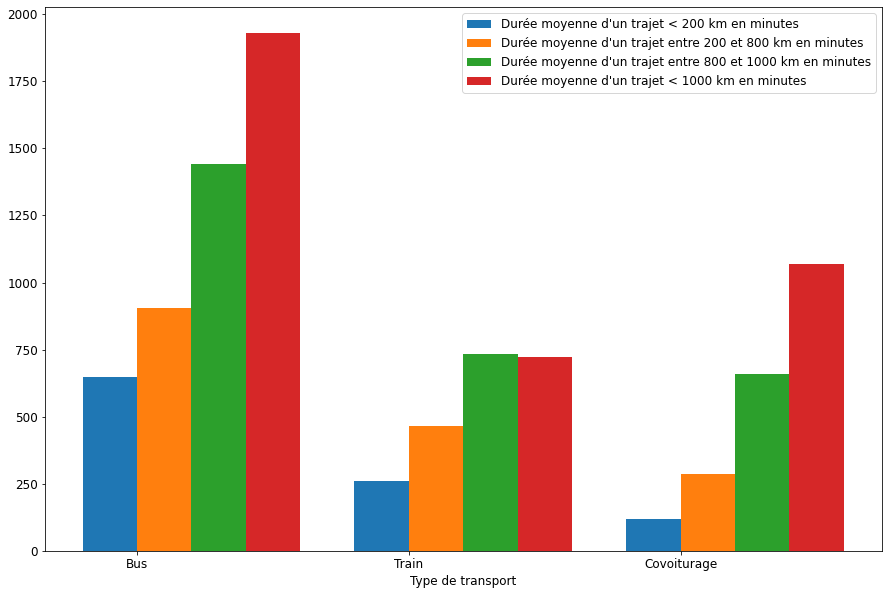

In [75]:
N = 3
ind = np.arange(N)

shortPrices = [np.mean(ticket_data_shortTicketBusDuration['duration']), np.mean(ticket_data_shortTicketTrainDuration['duration']), np.mean(ticket_data_shortTicketCarpoolingDuration['duration'])]
mediumPrices = [np.mean(ticket_data_mediumTicketBusDuration['duration']), np.mean(ticket_data_mediumTicketTrainDuration['duration']), np.mean(ticket_data_mediumTicketCarpoolingDuration['duration'])]
longPrices = [np.mean(ticket_data_longTicketBusDuration['duration']), np.mean(ticket_data_longTicketTrainDuration['duration']), np.mean(ticket_data_longTicketCarpoolingDuration['duration'])]
extraLongPrices = [np.mean(ticket_data_extraLongTicketBusDuration['duration']), np.mean(ticket_data_extraLongTicketTrainDuration['duration']), np.mean(ticket_data_extraLongTicketCarpoolingDuration['duration'])]

plt.figure(figsize=(15,10))
width = 0.2       
plt.bar(ind, shortPrices , width, label='Durée moyenne d\'un trajet < 200 km en minutes')
plt.bar(ind + width, mediumPrices , width, label='Durée moyenne d\'un trajet entre 200 et 800 km en minutes')
plt.bar(ind + 2*width, longPrices, width, label='Durée moyenne d\'un trajet entre 800 et 1000 km en minutes')
plt.bar(ind + 3*width, extraLongPrices , width, label='Durée moyenne d\'un trajet < 1000 km en minutes')
plt.xlabel('Type de transport')
plt.xticks(ind + width / 2, ('Bus', 'Train', 'Covoiturage'))
plt.legend(loc='best')
plt.show()

Plusieurs conclusions sont possible depuis ce graphique. Tout d'abord les trajets en bus sont lents, du moins plus lents qu'avec les autres moyens de transports. Maintenant pour parler des trajets en train et en covoiturage, de la même façon que pour les prix des trajets, en fonction de la distance de trajet le type de transport optimal n'est pas le même. Ici avec nos données nous observons que pour les trajets < 1000 km le covoiturage est plus rapide mais au dela, le train est largement plus rapide.

Une autre donnée que nous n'avons pas exploité jusqu'à mainenant est la date à laquelle le trajet a été réservé. En calculant le delta entre la date de réservation et la date de début de trajet nous pouvons déterminer quel type de transport est réservé longtemps à l'avance et lesquels sont le plus spontané.

## 3.4 Analyse de la date de réservation des trajets

In [76]:
ticket_data_duration['search_ts'] = ticket_data_duration['search_ts'].apply(lambda x: x.split('.')[0])
ticket_data_duration['search_ts'] = ticket_data_duration['search_ts'].apply(lambda x: x.split('+')[0])

In [77]:
listDeltaReservation = []
for idx, row in ticket_data_duration.iterrows():
    search = datetime.strptime(row['search_ts'], "%Y-%m-%d %H:%M:%S")
    #print(arrival)
    departure = datetime.strptime(row['departure_ts'], "%Y-%m-%d %H:%M:%S")
    delta = departure - search
    #print(delta.total_seconds())
    listDeltaReservation.append(delta.total_seconds()/86400)

Delta calculé en jours.

In [78]:
listDeltaReservation

[12.57394675925926,
 12.53570601851852,
 12.550925925925926,
 12.550925925925926,
 12.897453703703704,
 5.185208333333334,
 5.248194444444445,
 5.254652777777777,
 5.372708333333334,
 5.372708333333334,
 5.483819444444444,
 5.497708333333334,
 5.497708333333334,
 5.497708333333334,
 5.497708333333334,
 5.525486111111111,
 5.539560185185185,
 5.539375,
 5.539375,
 5.539375,
 5.574097222222222,
 5.587986111111111,
 5.601875,
 5.615763888888889,
 5.615763888888889,
 5.622708333333334,
 5.622708333333334,
 5.622708333333334,
 5.657430555555556,
 5.664375,
 5.664375,
 5.664375,
 5.685208333333334,
 5.706041666666667,
 5.706041666666667,
 5.706041666666667,
 5.706041666666667,
 5.719930555555556,
 5.726875,
 5.726875,
 5.726875,
 5.747708333333334,
 5.755115740740741,
 5.7621064814814815,
 5.789375,
 5.789375,
 5.803263888888889,
 5.831493055555556,
 5.921319444444444,
 5.181111111111111,
 5.333888888888889,
 5.375555555555556,
 5.406805555555556,
 5.451944444444444,
 -15.909537037037037,
 5

In [79]:
count = 0
for delta in listDeltaReservation:
    if delta < 0:
        count += 1
print(count)

258


En observant les données on se rend compte que certains timestamps ne sont sont pas exploitable. Nous allons donc les retirer pour cette partie.

In [80]:
ticket_data_reservation = ticket_data_duration.copy()
ticket_data_reservation['reservation'] = listDeltaReservation

In [81]:
validSearchIndex = ticket_data_reservation['reservation'] >= 0
ticket_data_valid_reservation = ticket_data_reservation[validSearchIndex]

In [82]:
for idx, row in ticket_data_valid_reservation.iterrows():
    if row['reservation'] <0:
        print(idx)

In [83]:
ticket_data_valid_reservation

,id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city,distance,transport_type,duration,reservation
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00,2017-10-13 20:10:00,4550,2017-10-01 00:13:31,NaN,NaN,611,542,503.197167,carpooling,370.0,12.573947
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00,2017-10-14 06:55:00,1450,2017-10-01 00:13:35,"{149,418}",{13},611,542,504.165333,bus,1070.0,12.535706
2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00,2017-10-14 21:24:00,7400,2017-10-01 00:13:40,"{798,798,6794,6246}","{8377,8376}",611,542,504.318452,train,1917.0,12.550926
3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00,2017-10-14 11:02:00,13500,2017-10-01 00:13:40,"{798,798,6794,6246}","{8377,8376}",611,542,504.318452,train,1295.0,12.550926
4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00,2017-10-14 19:32:00,7710,2017-10-01 00:13:40,"{5983,5983}",{8380},611,542,504.318452,train,1306.0,12.897454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74163,6869182,13,279.0,10729.0,2017-10-27 02:30:00,2017-10-27 16:00:00,2590,2017-10-19 10:35:42,"{408,408}",{8371},628,562,343.822650,bus,810.0,7.662708
74164,6869185,9,279.0,304.0,2017-10-27 07:00:00,2017-10-27 13:30:00,2700,2017-10-19 10:35:42,"{1105,1105}",{9},628,562,339.709665,bus,390.0,7.850208
74165,6869187,8371,10642.0,304.0,2017-10-27 08:30:00,2017-10-27 15:15:00,3000,2017-10-19 10:35:42,"{1105,1105}",{9},628,562,343.259366,bus,405.0,7.912708
74166,6869189,13,279.0,304.0,2017-10-27 13:25:00,2017-10-27 21:10:00,2880,2017-10-19 10:35:42,"{863,863}",{13},628,562,339.709665,bus,465.0,8.117569


Text(0, 0.5, 'Nombre de trajet')

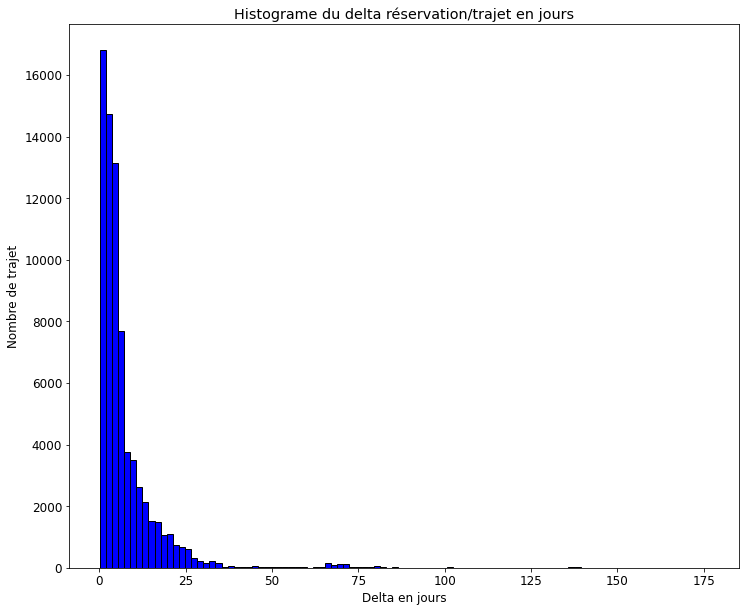

In [84]:
plt.hist(ticket_data_valid_reservation['reservation'], color = 'blue', edgecolor = 'black',
         bins = int(100))

plt.title('Histograme du delta réservation/trajet en jours')
plt.xlabel('Delta en jours')
plt.ylabel('Nombre de trajet')

In [85]:
delta = ticket_data_valid_reservation['reservation']

print('Delta min : ', np.min(delta), 'jours')
print('Delta moyen : ', np.mean(delta), 'jours')
print('Delta max : ', np.max(delta), 'jours')

Delta min :  0.08164351851851852 jours
Delta moyen :  7.3095592412193 jours
Delta max :  176.38429398148148 jours


In [86]:
quantilesDelta = delta.quantile([0.25,0.5,0.75]).to_list()
print('Premier quartile : ', quantilesDelta[0], 'jours')
print('Delta median : ', quantilesDelta[1], 'jours')
print('Quatrième quartile : ', quantilesDelta[2], 'jours')

Premier quartile :  1.9743315972222222 jours
Delta median :  4.139299768518518 jours
Quatrième quartile :  8.517034143518519 jours


La pluspart des trajets sont réservé moins de 10 jours avant le départ.

Voyons maintenant si la tendance est la même pour les différents types de transports !

In [87]:
busIndexReservation = ticket_data_valid_reservation['transport_type'] == 'bus'
carpoolingIndexReservation = ticket_data_valid_reservation['transport_type'] == 'carpooling'
trainIndexReservation = ticket_data_valid_reservation['transport_type'] == 'train'

ticket_data_reservation_bus = ticket_data_valid_reservation[busIndexReservation]
ticket_data_reservation_carpooling = ticket_data_valid_reservation[carpoolingIndexReservation]
ticket_data_reservation_train = ticket_data_valid_reservation[trainIndexReservation]

### 3.4.1 Analyse de la date de réservation des trajets en bus

Text(0, 0.5, 'Nombre de trajet')

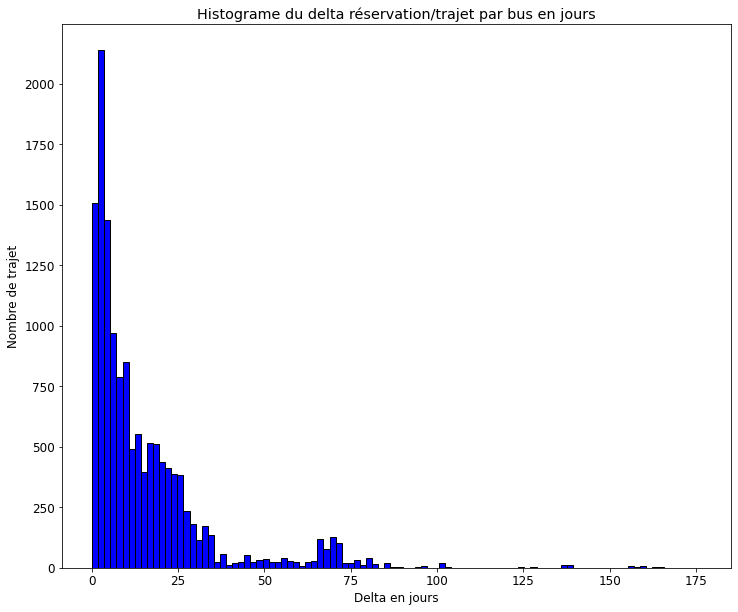

In [88]:
plt.hist(ticket_data_reservation_bus['reservation'], color = 'blue', edgecolor = 'black',
         bins = int(100))

plt.title('Histograme du delta réservation/trajet par bus en jours')
plt.xlabel('Delta en jours')
plt.ylabel('Nombre de trajet')

In [89]:
deltaBus = ticket_data_reservation_bus['reservation']

print('Delta min : ', np.min(deltaBus), 'jours')
print('Delta moyen : ', np.mean(deltaBus), 'jours')
print('Delta max : ', np.max(deltaBus), 'jours')

Delta min :  0.08525462962962962 jours
Delta moyen :  15.405543785196995 jours
Delta max :  176.38429398148148 jours


In [90]:
quantilesDeltaBus = deltaBus.quantile([0.25,0.5,0.75]).to_list()
print('Premier quartile : ', quantilesDeltaBus[0], 'jours')
print('Delta median : ', quantilesDeltaBus[1], 'jours')
print('Quatrième quartile : ', quantilesDeltaBus[2], 'jours')

Premier quartile :  3.4398813657407405 jours
Delta median :  9.024803240740741 jours
Quatrième quartile :  20.15248553240741 jours


### 3.4.2 Analyse de la date de réservation des trajets en train

Text(0, 0.5, 'Nombre de trajet')

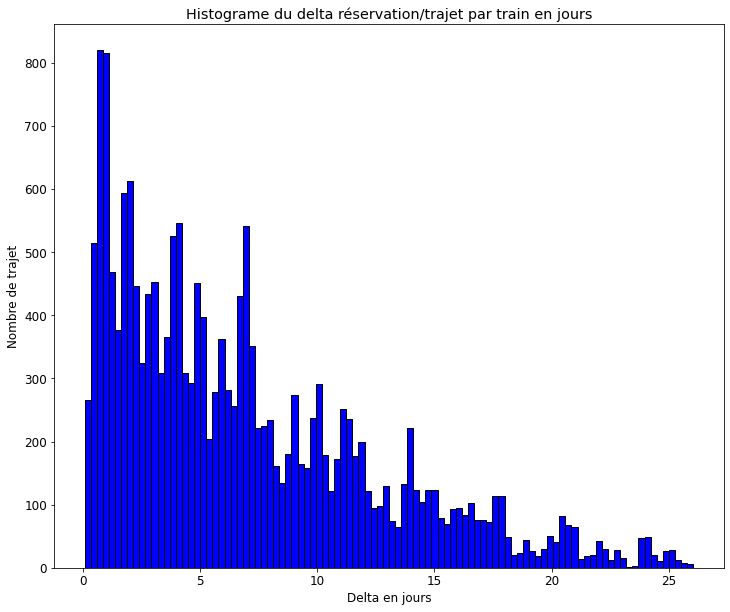

In [91]:
plt.hist(ticket_data_reservation_train['reservation'], color = 'blue', edgecolor = 'black',
         bins = int(100))

plt.title('Histograme du delta réservation/trajet par train en jours')
plt.xlabel('Delta en jours')
plt.ylabel('Nombre de trajet')

In [92]:
deltaTrain = ticket_data_reservation_train['reservation']

print('Delta min : ', np.min(deltaTrain), 'jours')
print('Delta moyen : ', np.mean(deltaTrain), 'jours')
print('Delta max : ', np.max(deltaTrain), 'jours')

Delta min :  0.08164351851851852 jours
Delta moyen :  6.886318462461088 jours
Delta max :  26.036469907407408 jours


In [93]:
quantilesDeltaTrain = deltaTrain.quantile([0.25,0.5,0.75]).to_list()
print('Premier quartile : ', quantilesDeltaTrain[0], 'jours')
print('Delta median : ', quantilesDeltaTrain[1], 'jours')
print('Quatrième quartile : ', quantilesDeltaTrain[2], 'jours')

Premier quartile :  2.291238425925926 jours
Delta median :  5.482743055555556 jours
Quatrième quartile :  10.087754629629629 jours


### 3.4.3 Analyse de la date de réservation des trajets en covoiturage

Text(0, 0.5, 'Nombre de trajet')

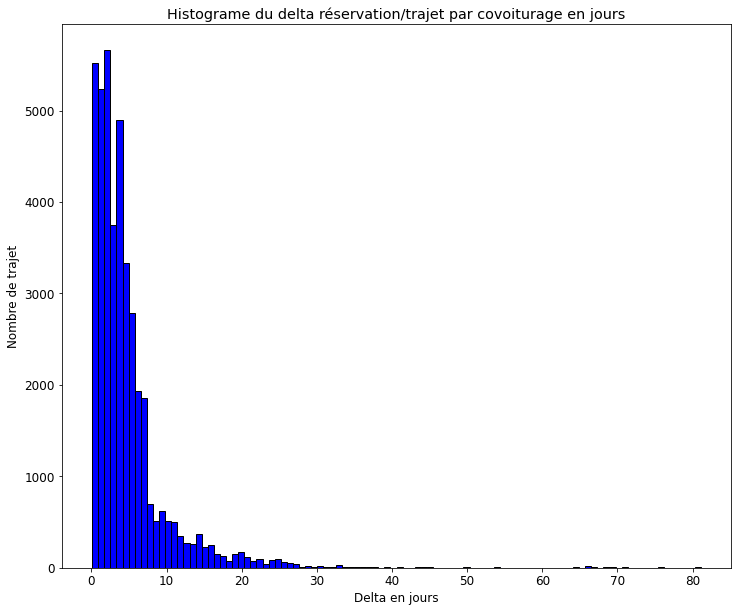

In [94]:
plt.hist(ticket_data_reservation_carpooling['reservation'], color = 'blue', edgecolor = 'black',
         bins = int(100))

plt.title('Histograme du delta réservation/trajet par covoiturage en jours')
plt.xlabel('Delta en jours')
plt.ylabel('Nombre de trajet')

In [95]:
deltaCarpooling = ticket_data_reservation_carpooling['reservation']

print('Delta min : ', np.min(deltaCarpooling), 'jours')
print('Delta moyen : ', np.mean(deltaCarpooling), 'jours')
print('Delta max : ', np.max(deltaCarpooling), 'jours')

Delta min :  0.0921412037037037 jours
Delta moyen :  4.791605958634496 jours
Delta max :  81.10388888888889 jours


In [96]:
quantilesDeltaCarpooling = deltaCarpooling.quantile([0.25,0.5,0.75]).to_list()
print('Premier quartile : ', quantilesDeltaCarpooling[0], 'jours')
print('Delta median : ', quantilesDeltaCarpooling[1], 'jours')
print('Quatrième quartile : ', quantilesDeltaCarpooling[2], 'jours')

Premier quartile :  1.611087962962963 jours
Delta median :  3.4416782407407407 jours
Quatrième quartile :  5.673136574074075 jours


### 3.4.4 Résumé analyse de la date de réservation des trajets

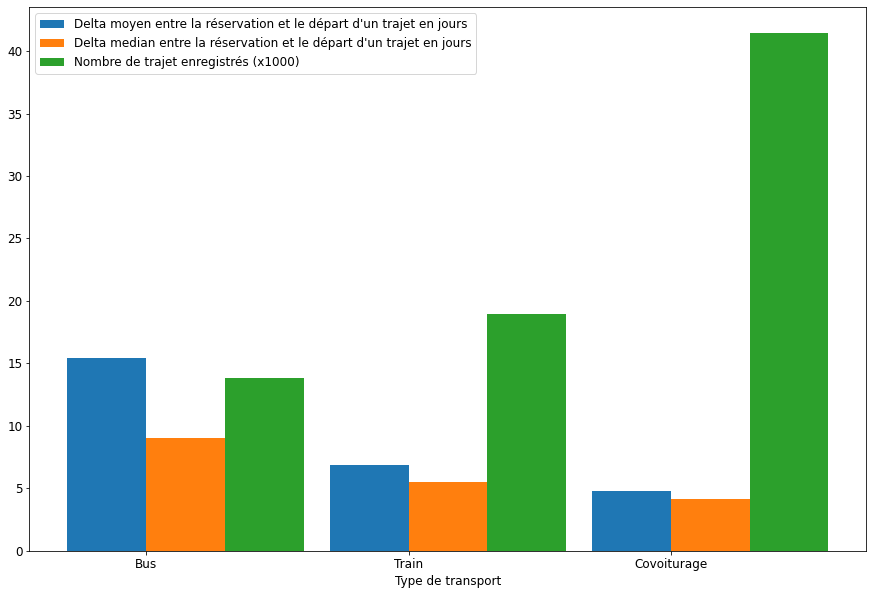

In [98]:
N = 3
ind = np.arange(N)

meanDelta = [np.mean(deltaBus), np.mean(deltaTrain), np.mean(deltaCarpooling)]
meadianDelta = [quantilesDeltaBus[1], quantilesDeltaTrain[1], quantilesDelta[1]]
ticketNumber =  [ticket_data_transport_type_bus.shape[0]/1000, ticket_data_transport_type_train.shape[0]/1000, ticket_data_transport_type_carpooling.shape[0]/1000]

plt.figure(figsize=(15,10))
width = 0.3       
plt.bar(ind, meanDelta , width, label='Delta moyen entre la réservation et le départ d\'un trajet en jours')
plt.bar(ind + width, meadianDelta , width, label='Delta median entre la réservation et le départ d\'un trajet en jours')
plt.bar(ind + 2*width, ticketNumber, width, label='Nombre de trajet enregistrés (x1000)')
plt.xlabel('Type de transport')
plt.xticks(ind + width / 2, ('Bus', 'Train', 'Covoiturage'))
plt.legend(loc='best')
plt.show()

Si nous nous basons sur les delta moyen entre la date de réservation et le début du trajet, nous pouvons remarquer que les trajets en covoiturages sont réservés seulement quelques jours à l'avance (3.4 jours), encore plus tard que les trajets en train (5.4 jours) alors que les trajets en bus sont réservé 9 jours en avance !
Si je prend l'exemple du week-end dernier où des amis et moi se sommes rendu à Paris, j'ai réservé mon train 5 jours avant et un ami a réservé son covoiturage 3 jours avant. C'est pas dans l'exo mais je trouvais ça supprenant d'être aussi proche des stats extraites :)

# 4 Visualisation des trajets les plus populaires avec GeoPandas (si temps)